__дополнительные возможности оформления notebook__

_Евгений Борисов <esborisov@sevsu.ru>_

---

Добавляем в Jupyter Notebooks красоту и интерактивность   
https://habr.com/ru/post/485318/

---

## табличные данные

In [1]:
# данные
tabledata = [["Москва", 2561, 12615882],
         ["Санкт-Петербург", 1439, 5383890],
         ["Ярославль", 205, 609828],
         ["Хабаровск", 383, 1321473]]

display(tabledata)

[['Москва', 2561, 12615882],
 ['Санкт-Петербург', 1439, 5383890],
 ['Ярославль', 205, 609828],
 ['Хабаровск', 383, 1321473]]

----

# вывод HTML

In [2]:
# from IPython.display import display
from IPython.display import HTML

# рисуем таблицу
def t_row(row): 
    return  '<tr>'+' '.join(['<td>'+str(cell)+'</td>' for cell in row ])+'</tr>'

def t_body(data): 
    return '\n'.join([t_row(row) for row in data ])

def t_header(columns):
    return '<tr>'+' '.join([ '<th>' + col + '</th>' for col in columns if columns ])+'</tr>'

def list2table(data,columns=''):
    if len(data)<1: return HTML('<b>Нет данных</b>')
    return '<table>' + t_header(columns) + t_body(data) + '</table>'

# display( HTML( list2table(tabledata, columns=["Город","Площадь (кв. км)", "Население (человек)"]) ) )

display( HTML( list2table(tabledata, columns=["Город","Площадь (кв. км)", "Население (человек)"]) ) )

Город,Площадь (кв. км),Население (человек)
Москва,2561,12615882
Санкт-Петербург,1439,5383890
Ярославль,205,609828
Хабаровск,383,1321473


## для формирования таблицы используем пакет tabulate

In [6]:
# !pip3 install tabulate

In [5]:
from tabulate import tabulate 

# простая таблица
print(tabulate(tabledata))

---------------  ----  --------
Москва           2561  12615882
Санкт-Петербург  1439   5383890
Ярославль         205    609828
Хабаровск         383   1321473
---------------  ----  --------


In [7]:
# таблица в HTML
display( tabulate(tabledata, tablefmt='html') )

Москва,2561,12615882
Санкт-Петербург,1439,5383890
Ярославль,205,609828
Хабаровск,383,1321473


In [8]:
# таблица в HTML с заголовком
display( tabulate(
    tabledata, 
    headers=["Город","Площадь (кв. км)", "Население (человек)"], 
    tablefmt='html', 
    showindex="always"
) )

,Город,Площадь (кв. км),Население (человек)
0,Москва,2561,12615882
1,Санкт-Петербург,1439,5383890
2,Ярославль,205,609828
3,Хабаровск,383,1321473


## картинки в коде

In [9]:
from IPython.core.display import Image

display( Image(url='https://www.python.org/static/img/python-logo.png', width = 200) )

вставка ссылки на картинку средствами markdown...

![sevsu](https://www.python.org/static/img/python-logo.png)

картинка целиком в ячейке markdown

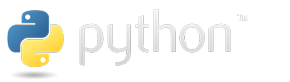

## декорирование текста

In [10]:
display( HTML("<font color='green'>Мой зеленый текст</font>") )

In [11]:
# !pip install termcolor

## progressBar

In [12]:
from numpy import random as rng
from time import sleep
from tqdm.notebook import tqdm
# from tqdm import tqdm


def run_something(): 
    sleep(rng.rand())
    return rng.rand()**rng.randint(5)
    
for i in tqdm(range(10)): run_something()

  0%|          | 0/10 [00:00<?, ?it/s]

## виджеты пакета ipywidgets

In [13]:
from ipywidgets import IntProgress
from time import sleep

prgBar = IntProgress(min = 0, max = 10) # Создаем прогрессбар
display(prgBar) # Выводим прогрессбар на экран

while prgBar.value < prgBar.max:   # Пока положение не дошло до максимума - продолжаем цикл
    prgBar.value = prgBar.value + 1 # Двигаем "полоску"
    sleep(.1)
    
print('Процесс завершен')

IntProgress(value=0, max=10)

Процесс завершен


In [14]:
from ipywidgets import Button 

# Создаем кнопку с нужными параметрами
button1 = Button(description="Нажми меня!", 
                        button_style='success' # 'success', 'info', 'warning', 'danger', ''
                        )

def on_button_clicked(b): # Описываем обработчик события
    print("Клик")

button1.on_click(on_button_clicked) # Назначаем этот обработчик на событие "on_click"

display(button1) # Отображаем кнопку

Button(button_style='success', description='Нажми меня!', style=ButtonStyle())

Клик


In [15]:
from ipywidgets import Button, Layout

button2 = Button(description='Кнопка с заданными размерами', button_style='success',
           layout=Layout(width='50%', height='80px'))
display(button2)

Button(button_style='success', description='Кнопка с заданными размерами', layout=Layout(height='80px', width=…

In [16]:
from ipywidgets import FloatSlider

fSlider = FloatSlider(
    value=7.5, # Первоначальное значение
    min=0,     # Минимум
    max=10.0,  # Максимум
    step=0.1,  # Шаг изменения
    description='Параметр:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

def on_value_change(b):
    print(b['old'], '->', b['new'])

fSlider.observe(on_value_change, names='value')
display(fSlider)

FloatSlider(value=7.5, continuous_update=False, description='Параметр:', max=10.0)

7.5 -> 7.7


In [17]:
from ipywidgets import DatePicker

dPicker = DatePicker(
    description='Дата:'
)

def on_button_clicked(b):
    print(b['old'], '->', b['new'])

dPicker.observe(on_button_clicked, names='value')
display(dPicker)

DatePicker(value=None, description='Дата:', step=1)

None -> 2024-02-14


In [18]:
from ipywidgets import RadioButtons

rButtons1 = RadioButtons(
    options=['Красный', 'Желтый', 'Зеленый'],
    value='Желтый', # Выбор по умолчанию
    description='Цвет:'
)


def on_button_clicked(b):
    print(b['old'], '->', b['new'])

rButtons1.observe(on_button_clicked, names='value')
display(rButtons1)

RadioButtons(description='Цвет:', index=1, options=('Красный', 'Желтый', 'Зеленый'), value='Желтый')

Желтый -> Красный


In [19]:
from ipywidgets import Dropdown

dropdown1 = Dropdown(
    options=[('Красный', 1), ('Желтый', 2), ('Зеленый', 3)],
    value=2, # Выбор по умолчанию
    description='Цвет:' 
)

def on_button_clicked(b):
    print(b['old'], '->', b['new'])

dropdown1.observe(on_button_clicked, names='value')
display(dropdown1)

Dropdown(description='Цвет:', index=1, options=(('Красный', 1), ('Желтый', 2), ('Зеленый', 3)), value=2)

2 -> 1


In [20]:
from ipywidgets import Checkbox

cb1 = Checkbox(
    value=False,
    description='Согласен' 
)

def on_button_clicked(b):
    print(cb1.value)

cb1.observe(on_button_clicked, names='value')
display(cb1)

Checkbox(value=False, description='Согласен')

True


In [21]:
from ipywidgets import ToggleButton

tb1 = ToggleButton(
    value=False,
    description='Не нажата',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Принять условия',
    icon='check'
)
tb2 = ToggleButton(
    value=True,
    description='А эта нажата',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Принять условия',
    icon='check'
)

display(tb1, tb2)

ToggleButton(value=False, button_style='success', description='Не нажата', icon='check', tooltip='Принять усло…

ToggleButton(value=True, button_style='success', description='А эта нажата', icon='check', tooltip='Принять ус…

In [22]:
from ipywidgets import Textarea, Layout

Textarea1 = Textarea(
    value='Привет, Habr!',
    placeholder='Введите текст',
    description='Текст:',
    layout=Layout(width='600px', height='100px')
)

display(Textarea1)

Textarea(value='Привет, Habr!', description='Текст:', layout=Layout(height='100px', width='600px'), placeholde…

In [23]:
from ipywidgets import Accordion, IntSlider, Text

accordion = Accordion(children=[IntSlider(value=42), Text(value='Сорок два')])
accordion.set_title(0, 'Раздел 1')
accordion.set_title(1, 'Раздел 2')
display(accordion)

Accordion(children=(IntSlider(value=42), Text(value='Сорок два')), titles=('Раздел 1', 'Раздел 2'))

In [24]:
from ipywidgets import Tab, IntSlider, Text

tab = Tab()
tab.children = [IntSlider(value=42), Text(value='Сорок два')]
tab.set_title(0, 'Раздел 1')
tab.set_title(1, 'Раздел 2')

display(tab)